<a href="https://colab.research.google.com/github/ShohamBirman/Projects/blob/main/Machine_Learning_for_Daily_Bike_Rental_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Daily Bike Rental Predictions
## Dataset Description
### Bike Sharing
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

This is a real world dataset obtained from a bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research.

Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city.

**My mission is to try to predict the number of bikes being rented each day using the provided variables.**

### File descriptions
* train.csv - the training set
* test.csv - the test set

### Data Fields
* datetime - hourly date + timestamp
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - 1: Clear, Few clouds, Partly cloudy; 2: Mist + Cloudy
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals

### Evaluation
The evaluation metric is **Root Mean Squared Logarithmic Error**. Because this value is not only an absolute value, this metric is one of the most resistant metric to outliers that's possible using simple methods. Thus it is the most fair measure to calculate the number of bikes on the given data.



In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
df.shape

(365, 12)

In [ ]:
df.isna().sum()

id            0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [ ]:
df.dtypes

id              int64
season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [ ]:
df.describe()

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,105.510663,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,92.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,183.000000,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,274.000000,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,365.000000,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


In [ ]:
print(df['season'].value_counts())
print(df['holiday'].value_counts())
print(df['weekday'].value_counts())
print(df['workingday'].value_counts())
print(df['weathersit'].value_counts())

3    94
2    92
1    90
4    89
Name: season, dtype: int64
0    355
1     10
Name: holiday, dtype: int64
6    53
0    52
1    52
2    52
3    52
4    52
5    52
Name: weekday, dtype: int64
1    250
0    115
Name: workingday, dtype: int64
1    226
2    124
3     15
Name: weathersit, dtype: int64


In [ ]:
columns = df.columns

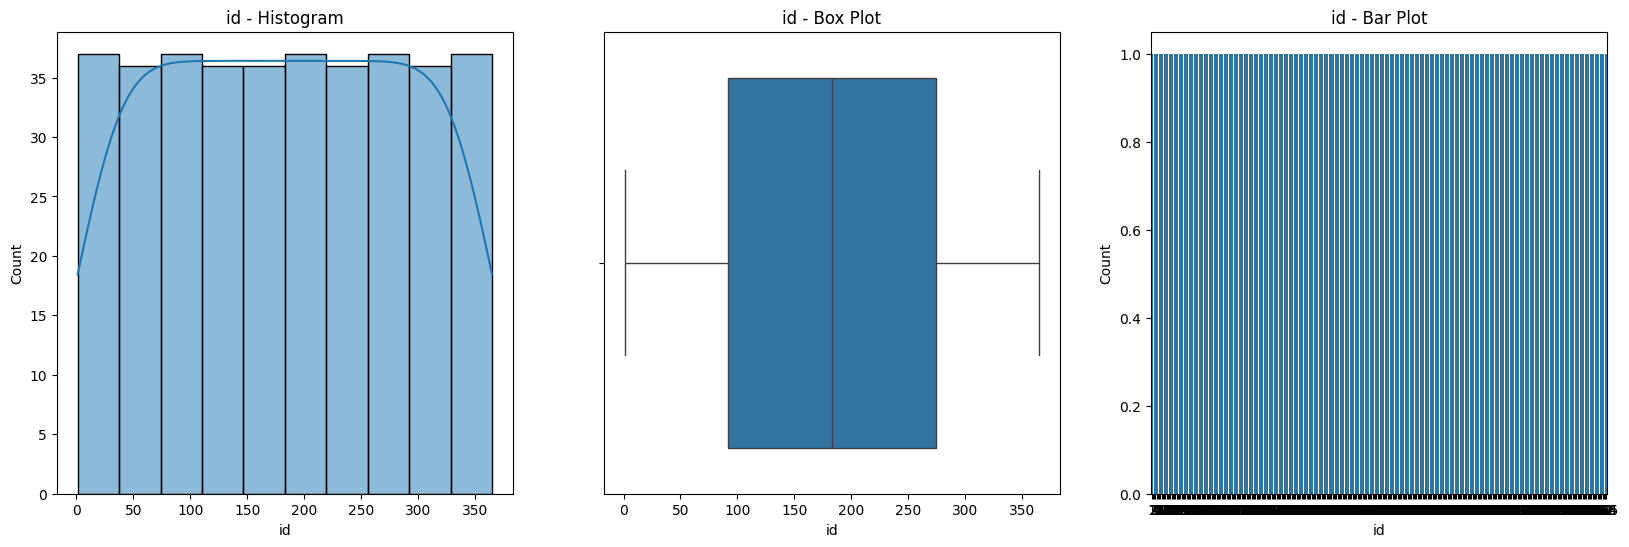

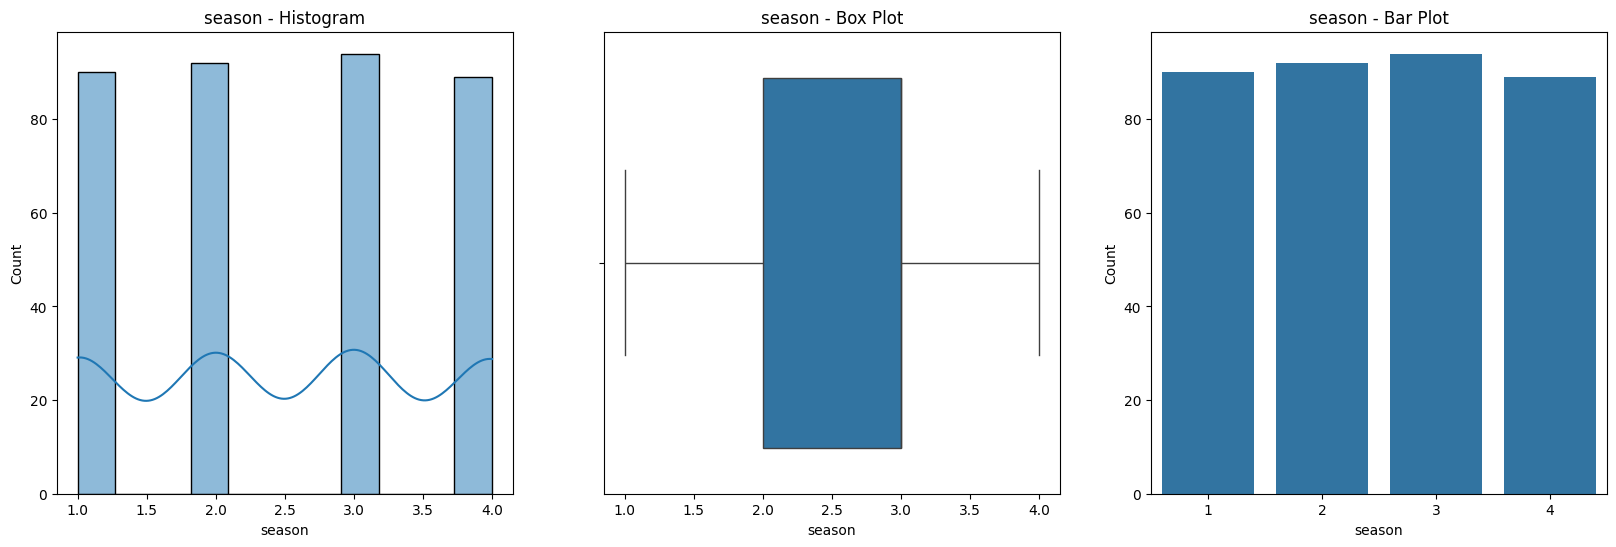

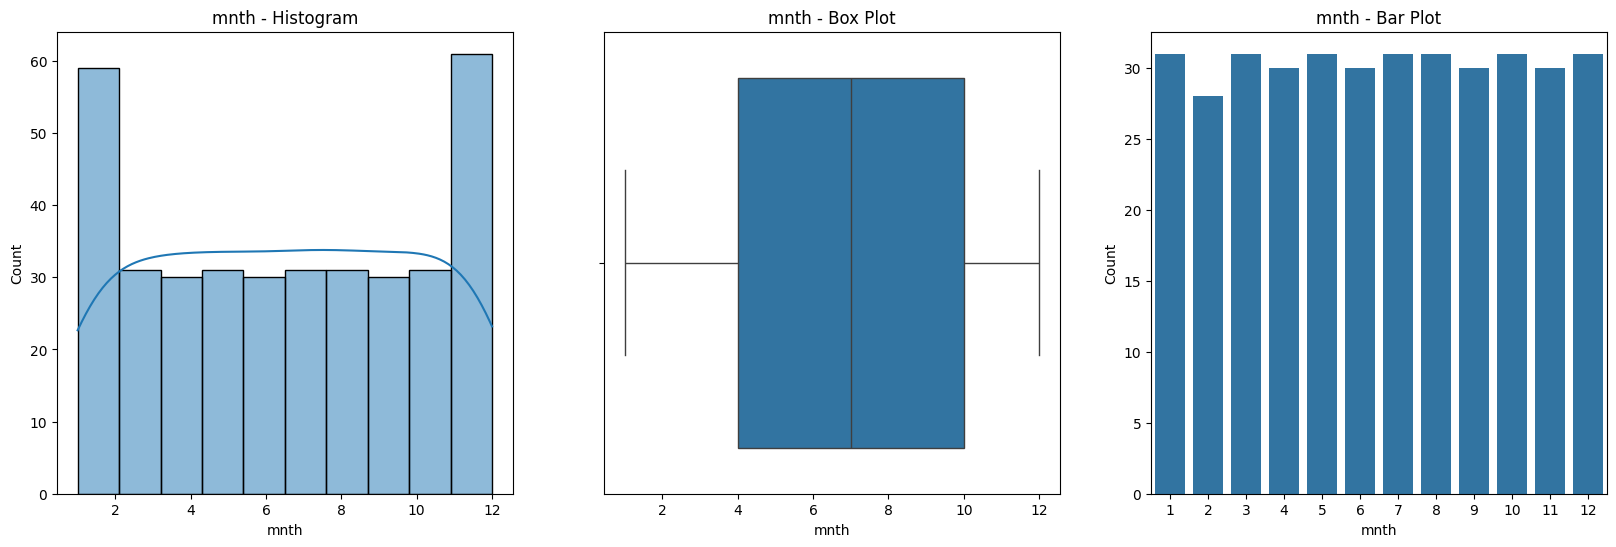

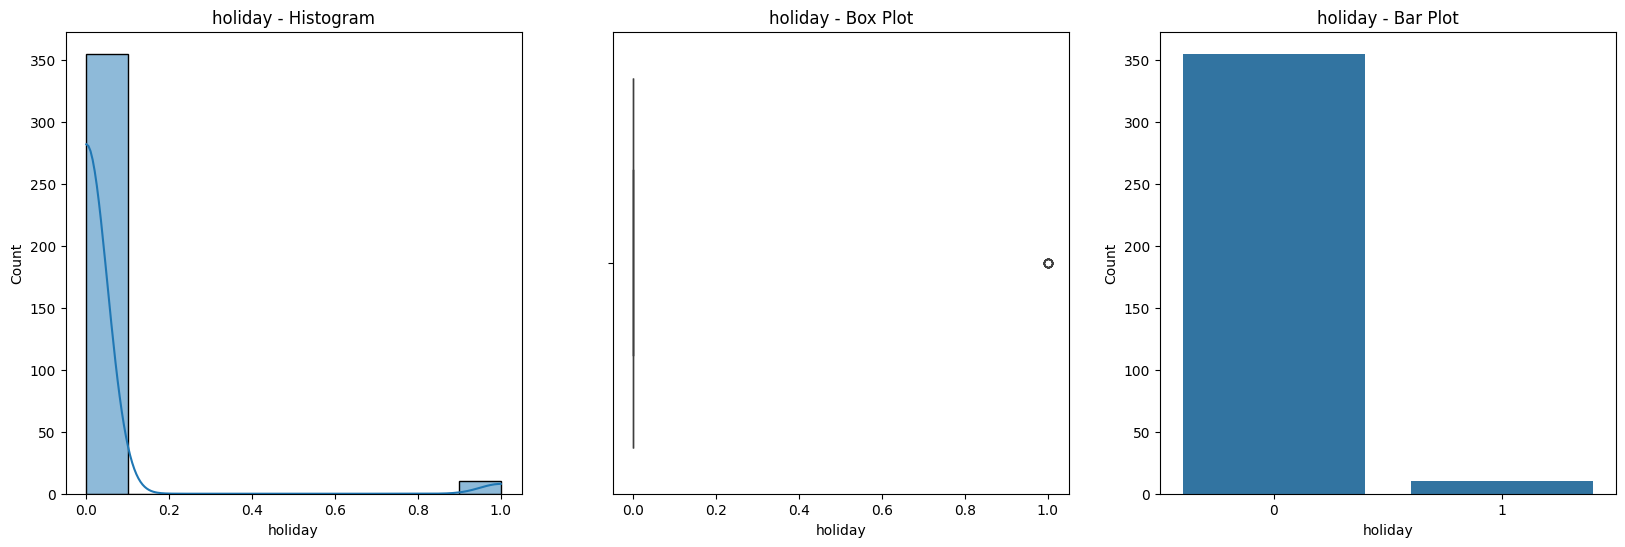

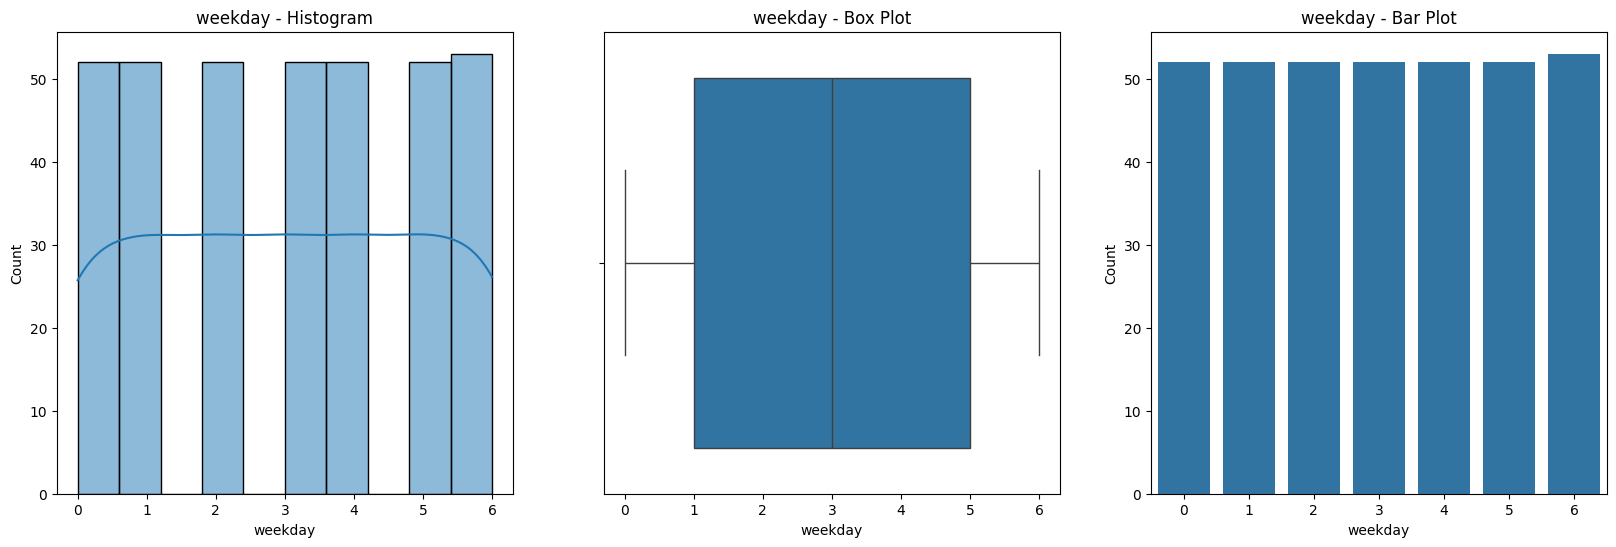

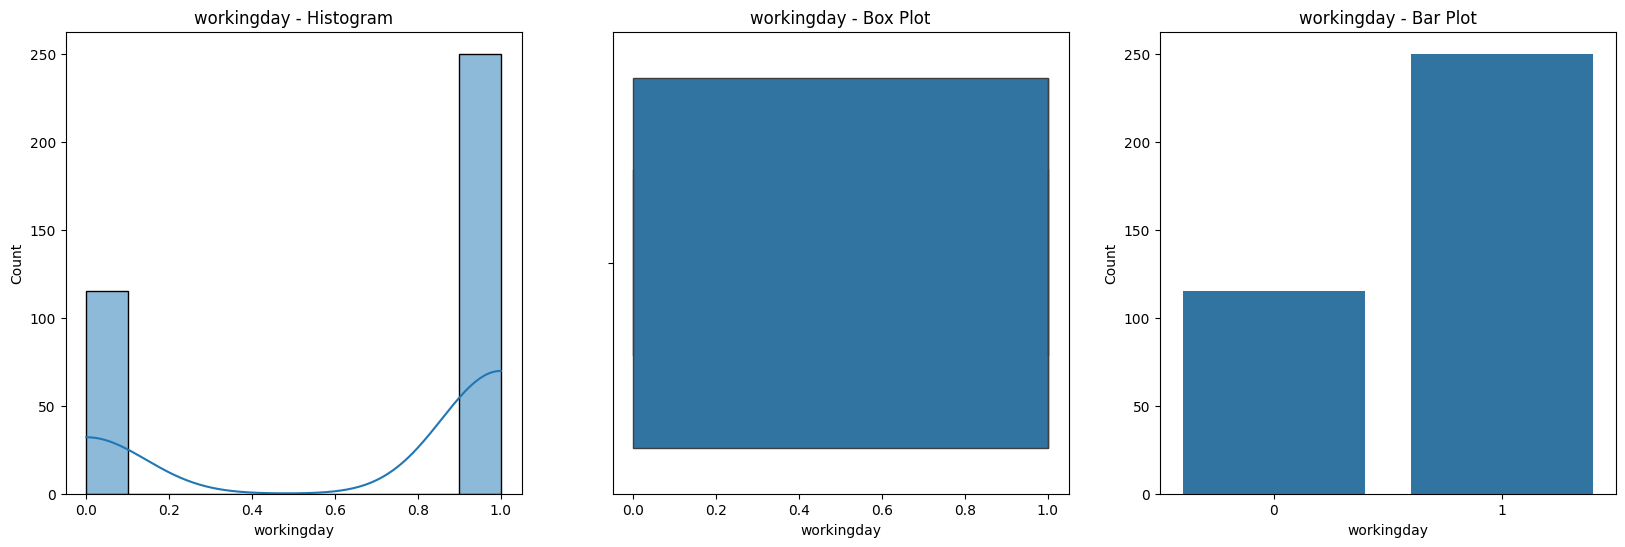

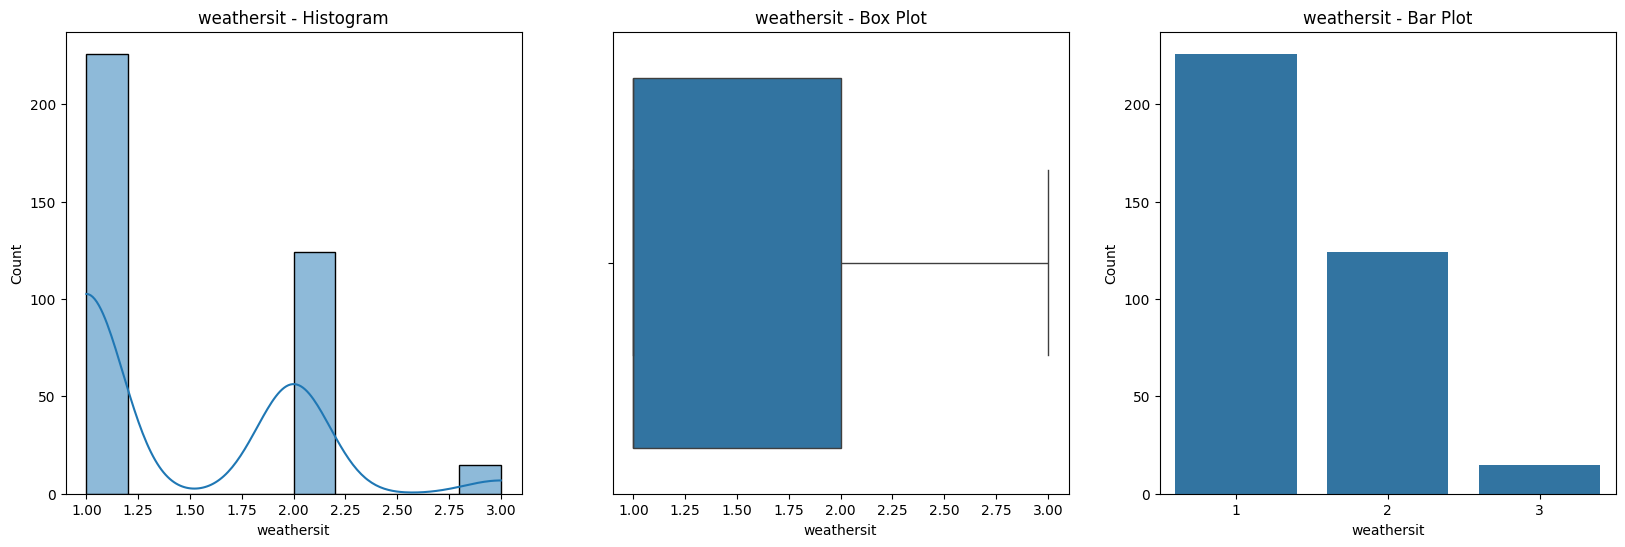

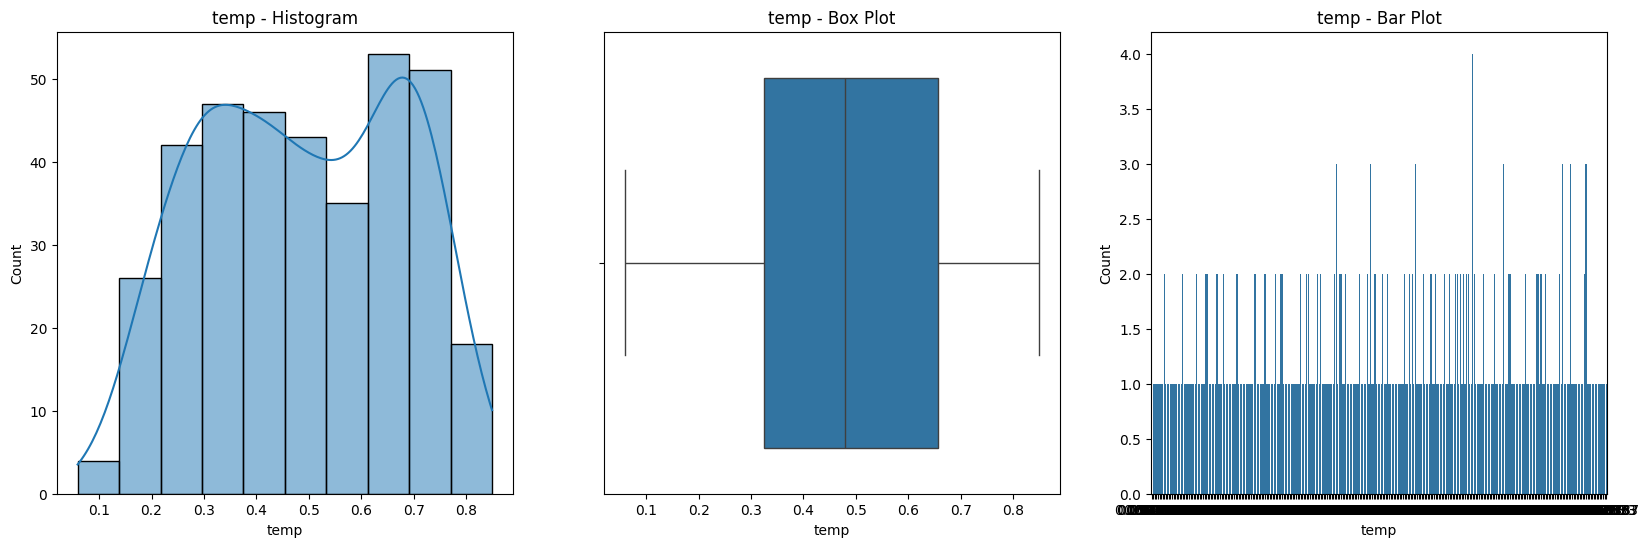

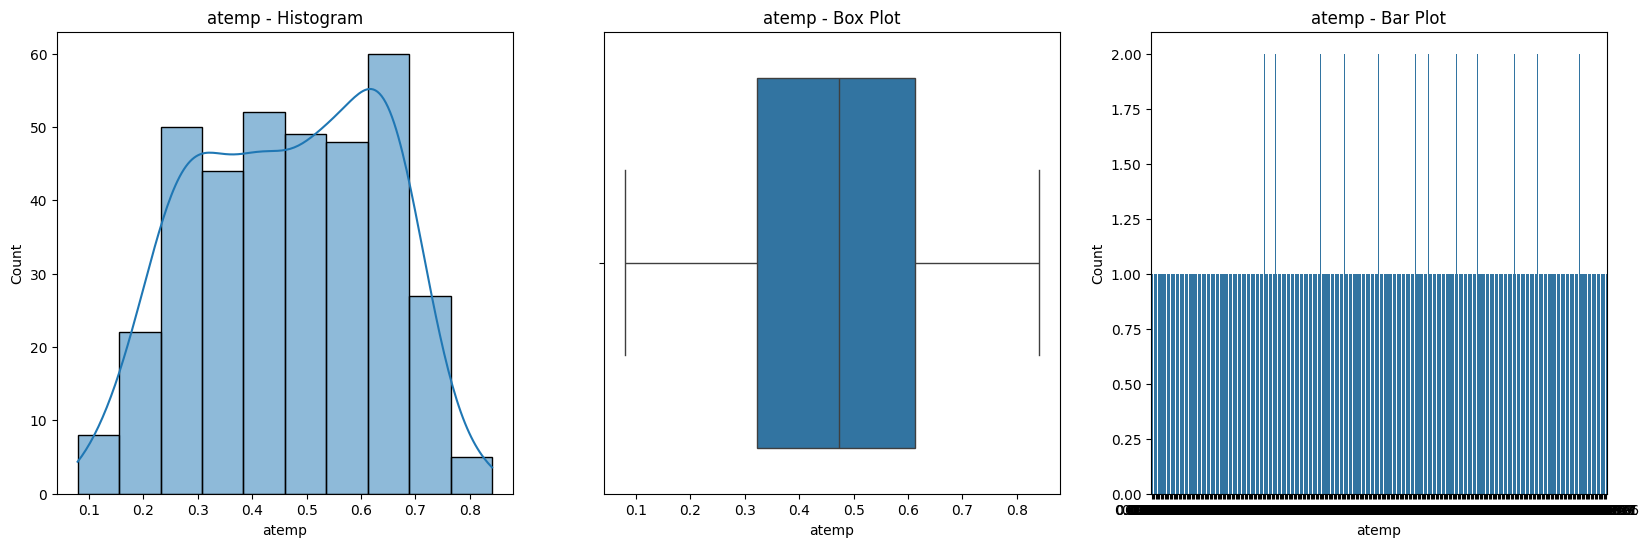

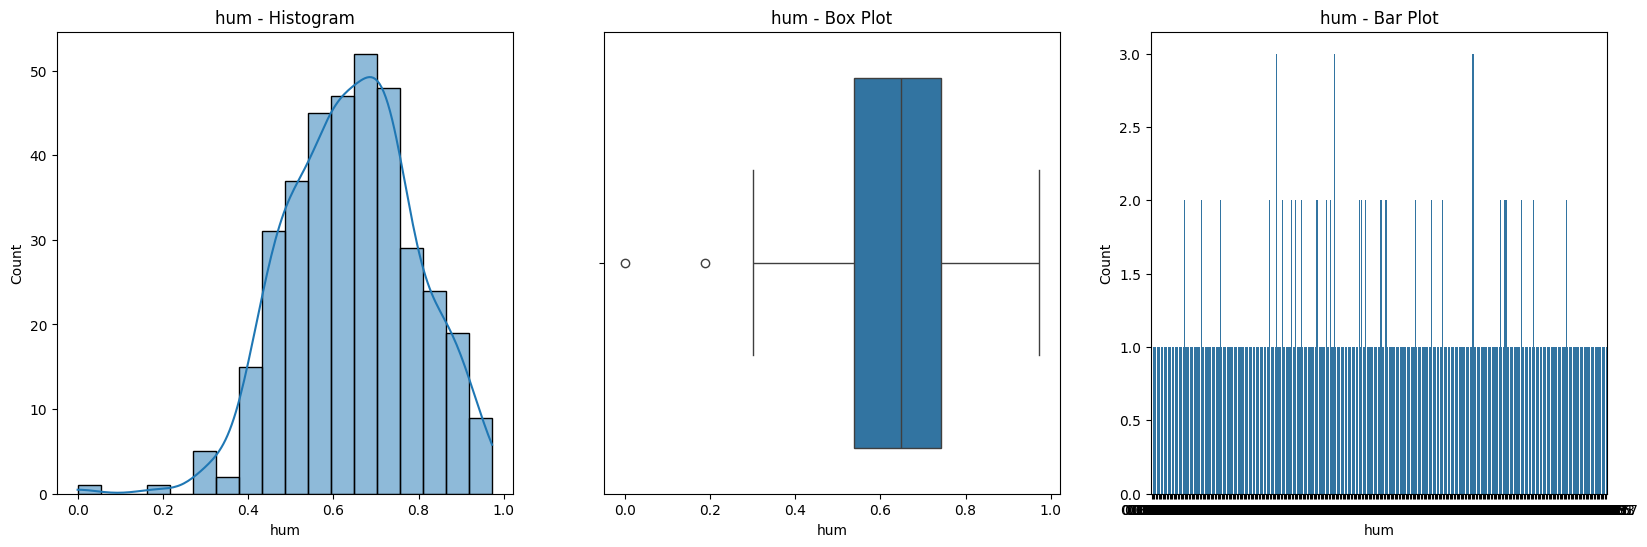

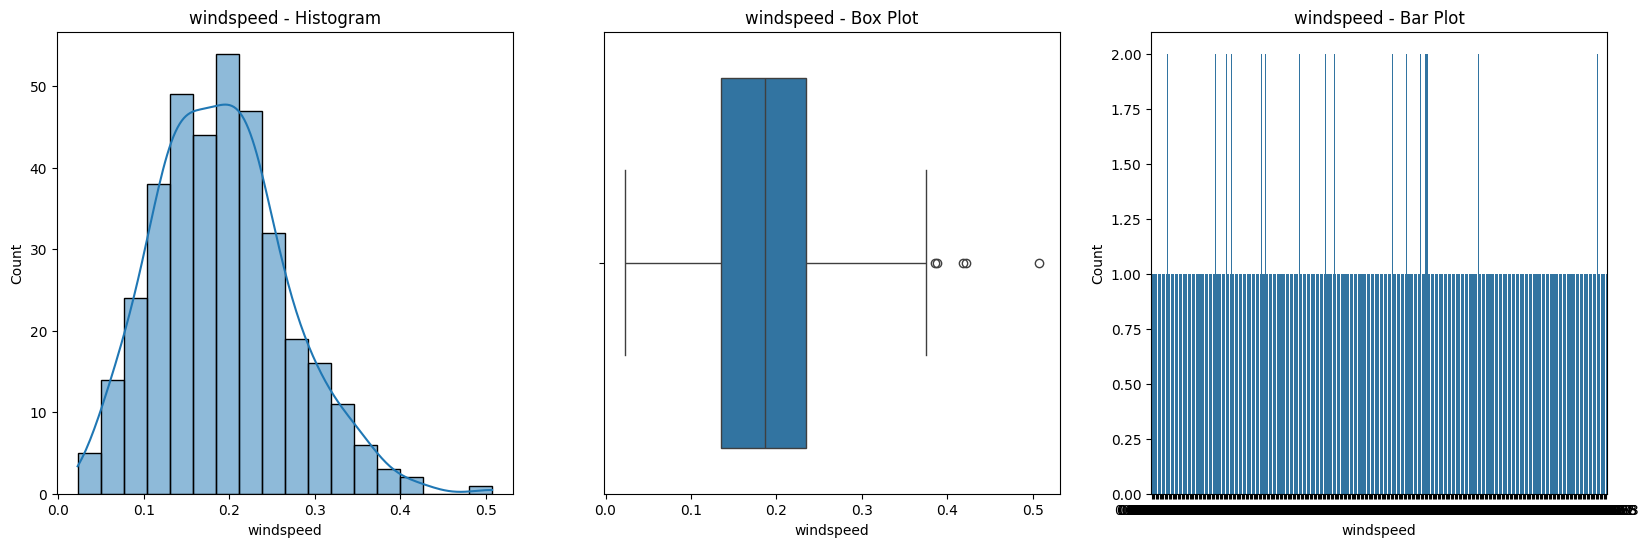

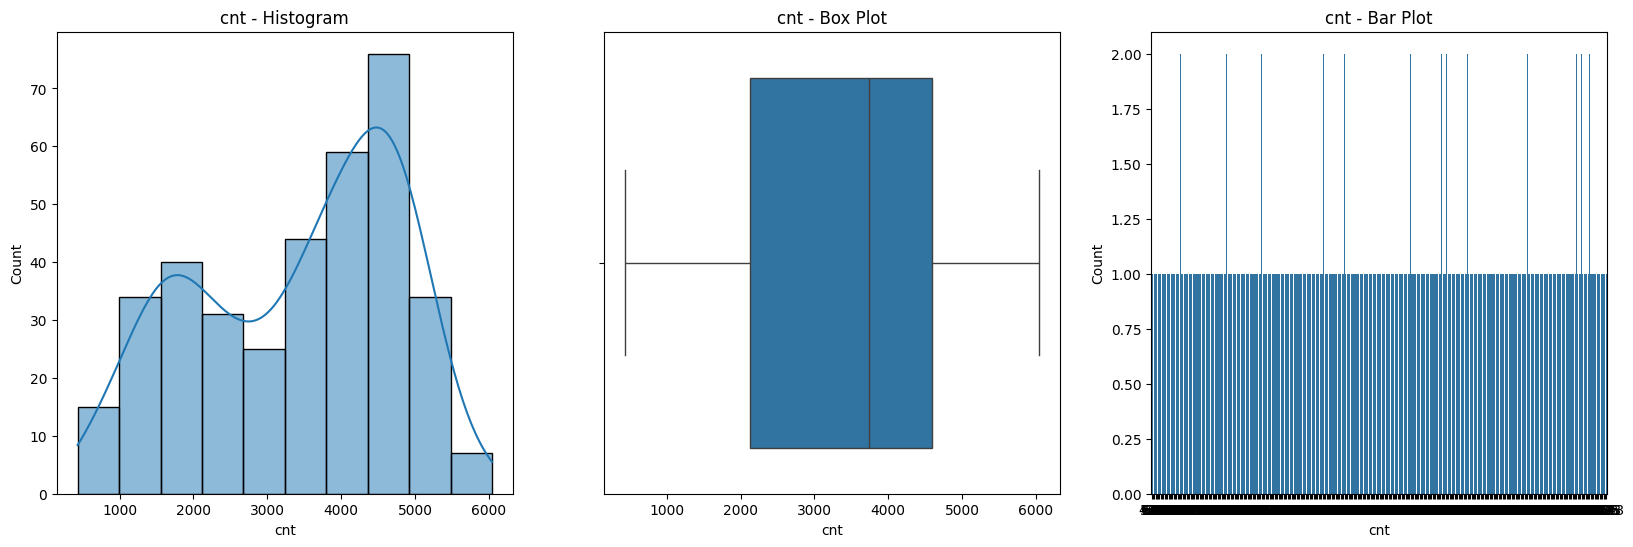

In [ ]:
for col in columns:
    plt.figure(figsize=(20, 6))
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(x=df[col], kde=True)
    plt.title(f'{col} - Histogram')
    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} - Box Plot')
    # Bar Plot
    plt.subplot(1, 3, 3)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(f'{col} - Bar Plot')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.show()

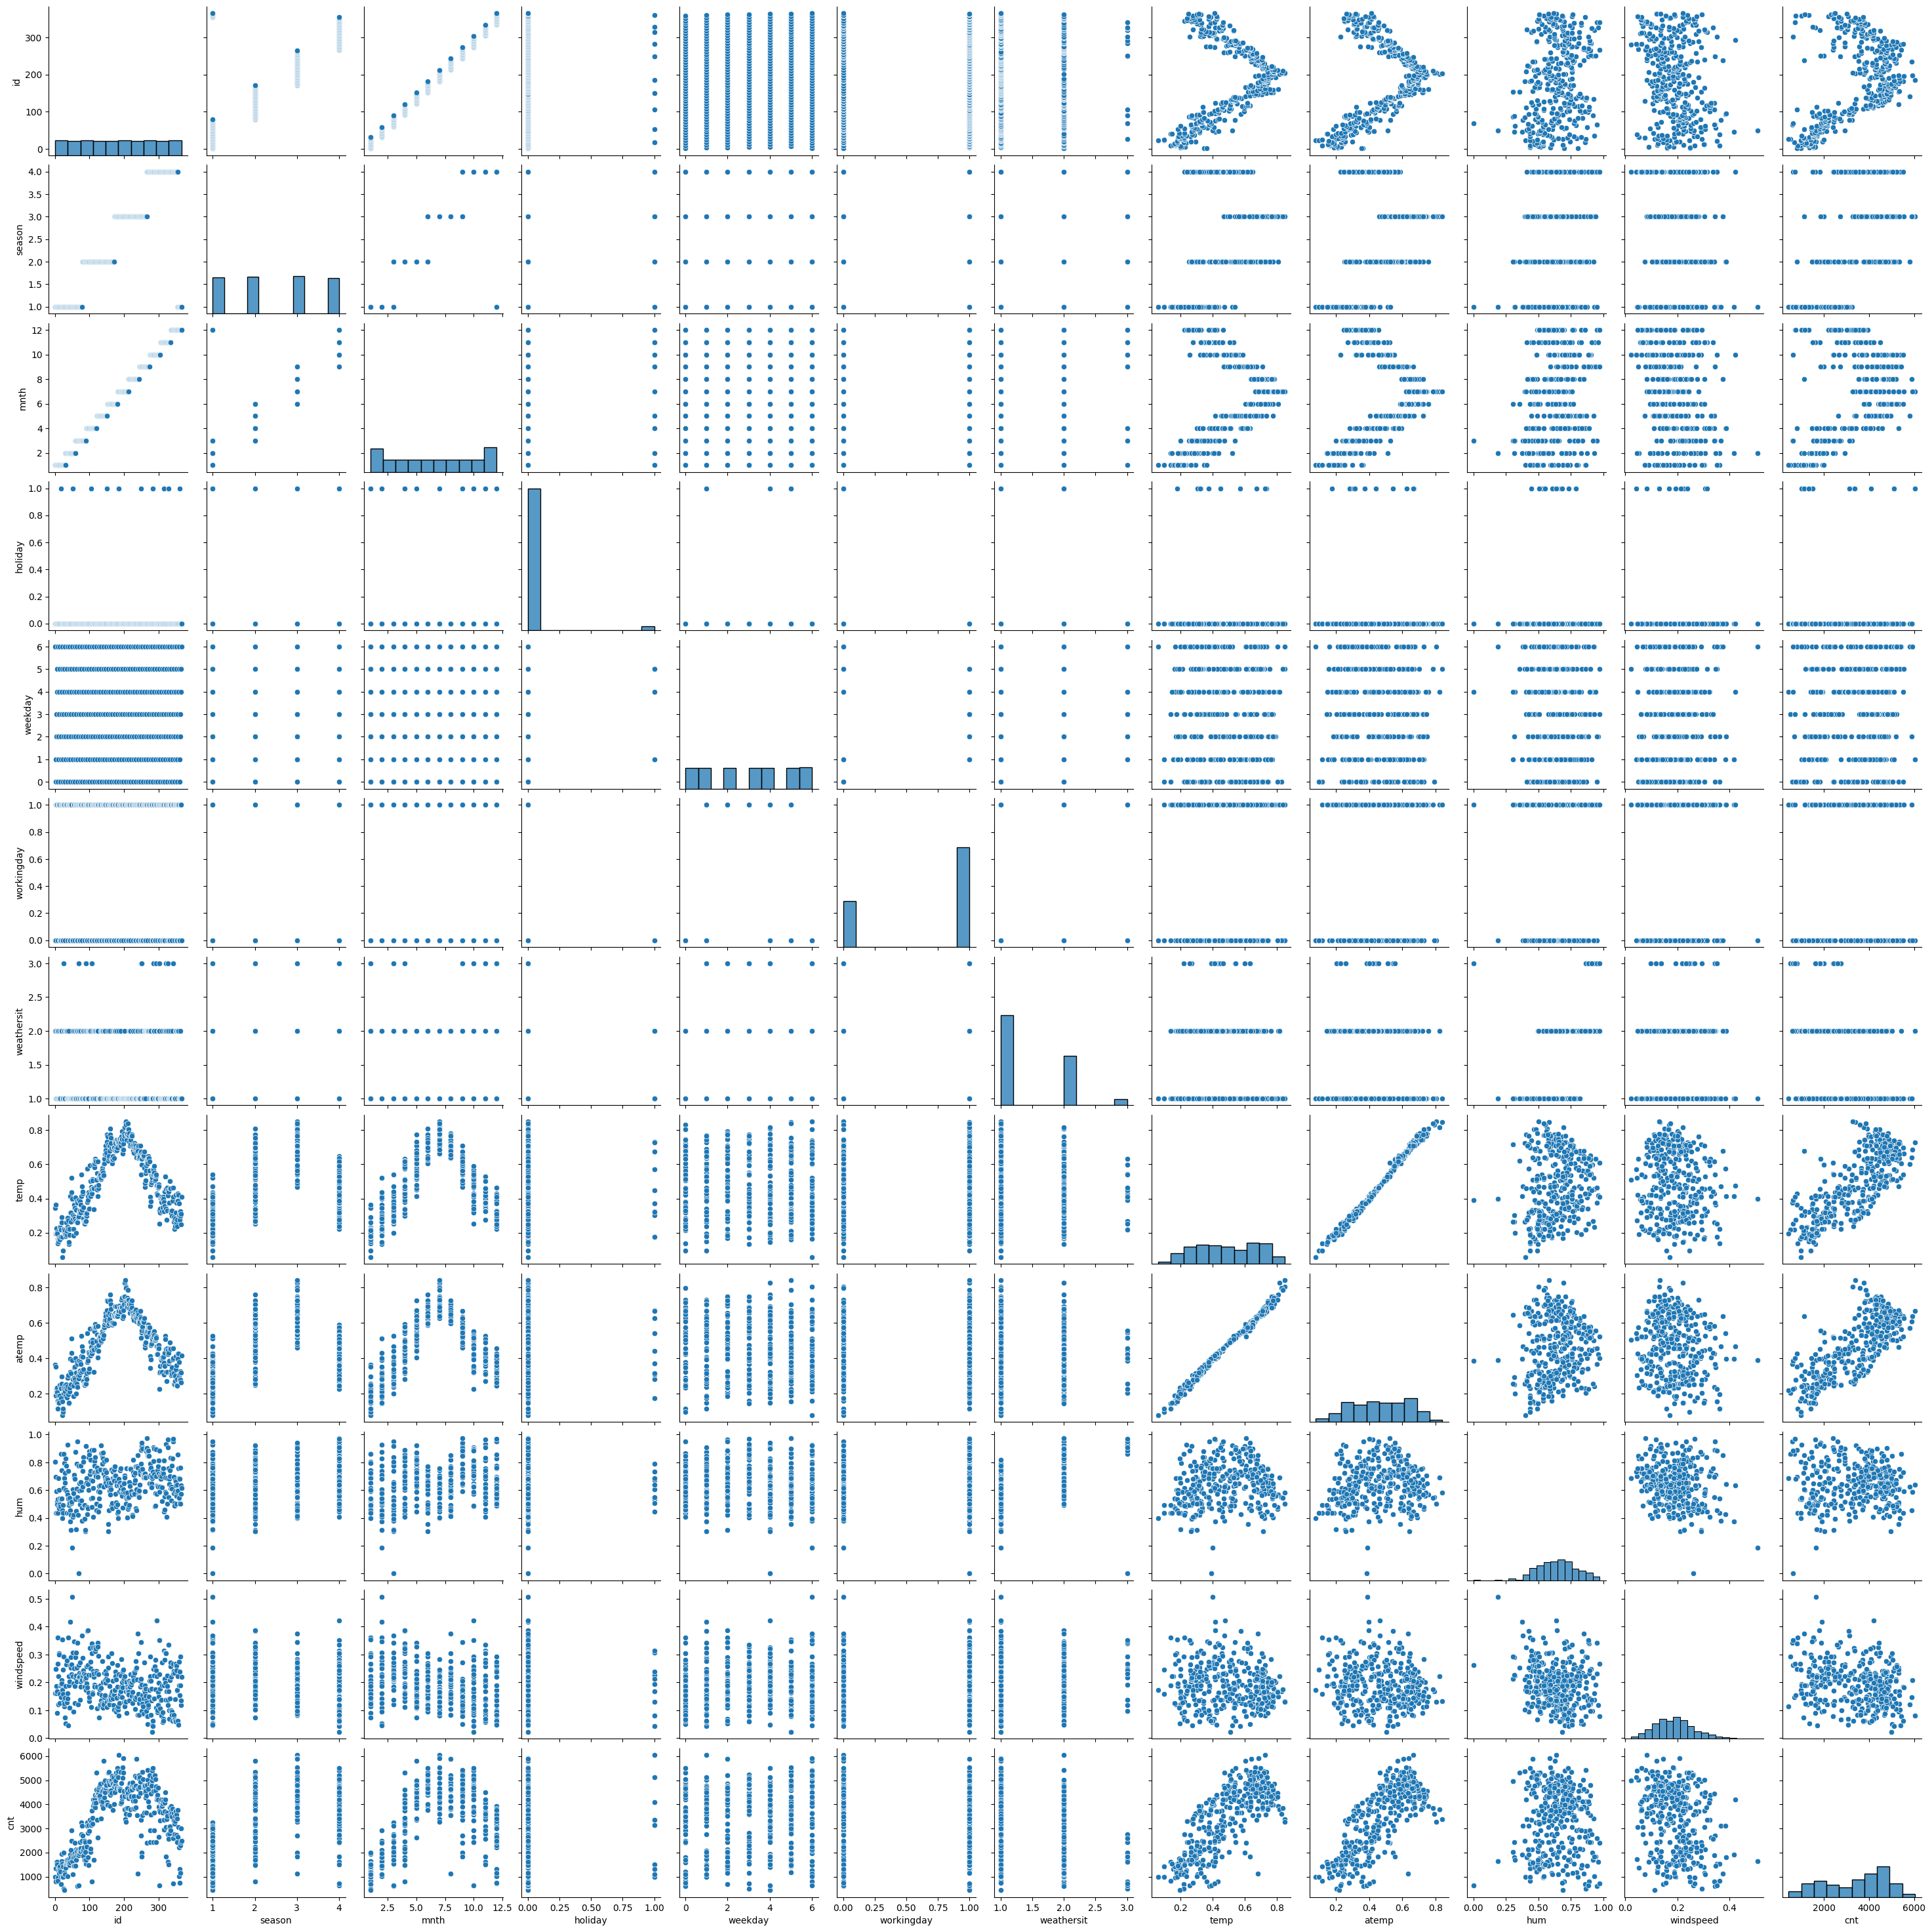

In [ ]:
# Multovariable graphs
sns.pairplot(df)

In [ ]:
from scipy import stats
correlation_data = []

for col1 in range(len(columns)):
    for col2 in range(col1 + 1, len(columns)):
        cor_spearman = stats.spearmanr(df[columns[col1]], df[columns[col2]])

        correlation_data.append({
                'Variable1': columns[col1],
                'Variable2': columns[col2],
                'SpearmanCorrelation': cor_spearman.correlation,
                'P-value': cor_spearman.pvalue
            })

correlation_df = pd.DataFrame(correlation_data)
high_correlation_df = correlation_df[correlation_df['P-value'] < 0.05].round(3)
high_correlation_df = high_correlation_df[high_correlation_df['Variable1'] != 'id']
high_correlation_df.sort_values(by=['P-value'])

,Variable1,Variable2,SpearmanCorrelation,P-value
11,season,mnth,0.831,0.000
62,atemp,cnt,0.767,0.000
59,temp,cnt,0.762,0.000
56,temp,atemp,0.998,0.000
55,weathersit,cnt,-0.305,0.000
53,weathersit,hum,0.598,0.000
63,hum,windspeed,-0.195,0.000
31,holiday,workingday,-0.247,0.000
29,mnth,cnt,0.391,0.000
65,windspeed,cnt,-0.258,0.000


In [ ]:
correlation_matrix = df.corr()

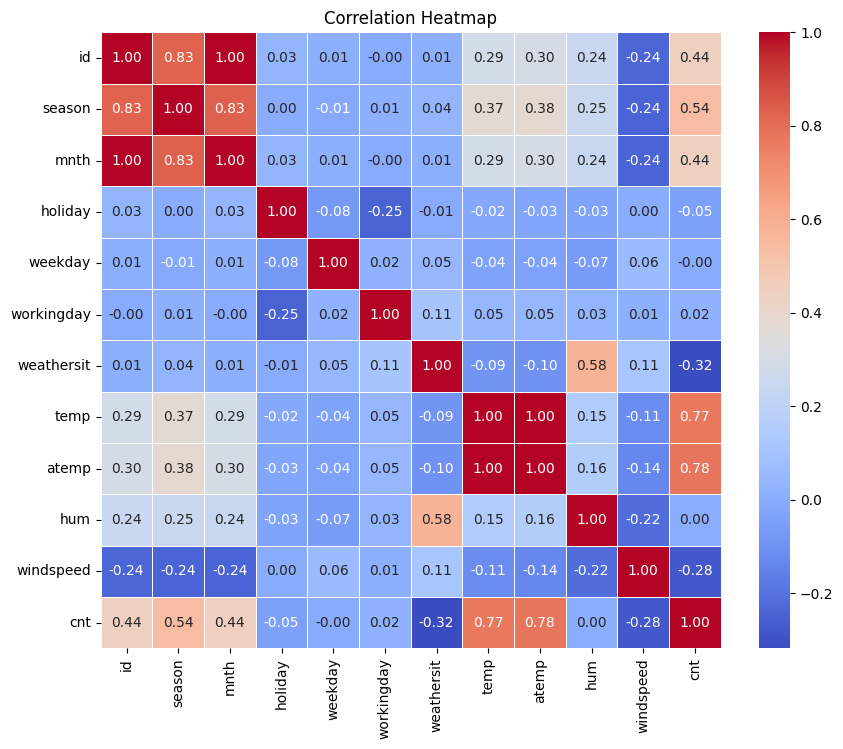

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Feature Enrichment

In [ ]:
days_in_month = df.groupby('mnth')['id'].count()
mean_temp_by_mnth = df.groupby('mnth')['temp'].mean().reindex(range(1, 13)).reset_index(drop=True).repeat(days_in_month)
days_in_week = df.groupby('weekday')['id'].count()
mean_temp_by_weekday = df.groupby('weekday')['temp'].mean().reindex(range(0, 7)).reset_index(drop=True).repeat(days_in_week)
temp_hum = df['temp'] * df['hum']
temp_windspeed = df['windspeed'] / df['temp']
mean_hum_by_mnth = df.groupby('mnth')['hum'].mean().reindex(range(1, 13)).reset_index(drop=True).repeat(days_in_month)
mean_windspeed_by_mnth = df.groupby('mnth')['windspeed'].mean().reindex(range(1, 13)).reset_index(drop=True).repeat(days_in_month)
mean_cnt_by_mnth = df.groupby('mnth')['cnt'].mean().reindex(range(1, 13)).reset_index(drop=True).repeat(days_in_month)
mean_cnt_by_weekday = df.groupby('weekday')['cnt'].mean().reindex(range(0, 7)).reset_index(drop=True).repeat(days_in_week)
days_in_season = df.groupby('season')['id'].count()
mean_cnt_by_season = df.groupby('season')['cnt'].mean().reindex(range(1, 5)).reset_index(drop=True).repeat(days_in_season)
days_in_weathersit = df.groupby('weathersit')['id'].count()
mean_cnt_by_weathersit = df.groupby('weathersit')['cnt'].mean().reindex(range(1, 4)).reset_index(drop=True).repeat(days_in_weathersit)
temp_atemp_delta = df['temp'] - df['atemp']

In [ ]:
mean_cnt_by_holiday_1 = df.loc[df['holiday'] == 1, 'cnt'].mean()
mean_cnt_by_holiday_0 = df.loc[df['holiday'] == 0, 'cnt'].mean()
mean_cnt_by_workingday_1 = df.loc[df['workingday'] == 1, 'cnt'].mean()
mean_cnt_by_workingday_0 = df.loc[df['workingday'] == 0, 'cnt'].mean()

In [ ]:
print(mean_cnt_by_holiday_0)
print(mean_cnt_by_workingday_1)

3417.129577464789
3425.056


In [ ]:
df_features = df.copy()
df_features = df_features.loc[:, ~df_features.columns.isin(['id'])]
df_features.reset_index(drop=True, inplace=True)
df_features['mean_temp_by_mnth'] = mean_temp_by_mnth.reset_index(drop=True)
df_features['mean_temp_by_weekday'] = mean_temp_by_weekday.reset_index(drop=True)
df_features['temp_hum'] = temp_hum
df_features['temp_windspeed'] = temp_windspeed
df_features['mean_hum_by_mnth'] = mean_hum_by_mnth.reset_index(drop=True)
df_features['mean_windspeed_by_mnth'] = mean_windspeed_by_mnth.reset_index(drop=True)
df_features['mean_cnt_by_mnth'] = mean_cnt_by_mnth.reset_index(drop=True)
df_features['mean_cnt_by_weekday'] = mean_cnt_by_weekday.reset_index(drop=True)
df_features['mean_cnt_by_season'] = mean_cnt_by_season.reset_index(drop=True)
df_features['mean_cnt_by_weathersit'] = mean_cnt_by_weathersit.reset_index(drop=True)
df_features['temp_atemp_delta'] = temp_atemp_delta
df_features['mean_cnt_by_holiday'] = df_features['holiday'].map({1: mean_cnt_by_holiday_1, 0: mean_cnt_by_holiday_0})
df_features['mean_cnt_by_workingday'] = df_features['workingday'].map({1: mean_cnt_by_workingday_1, 0: mean_cnt_by_workingday_0})

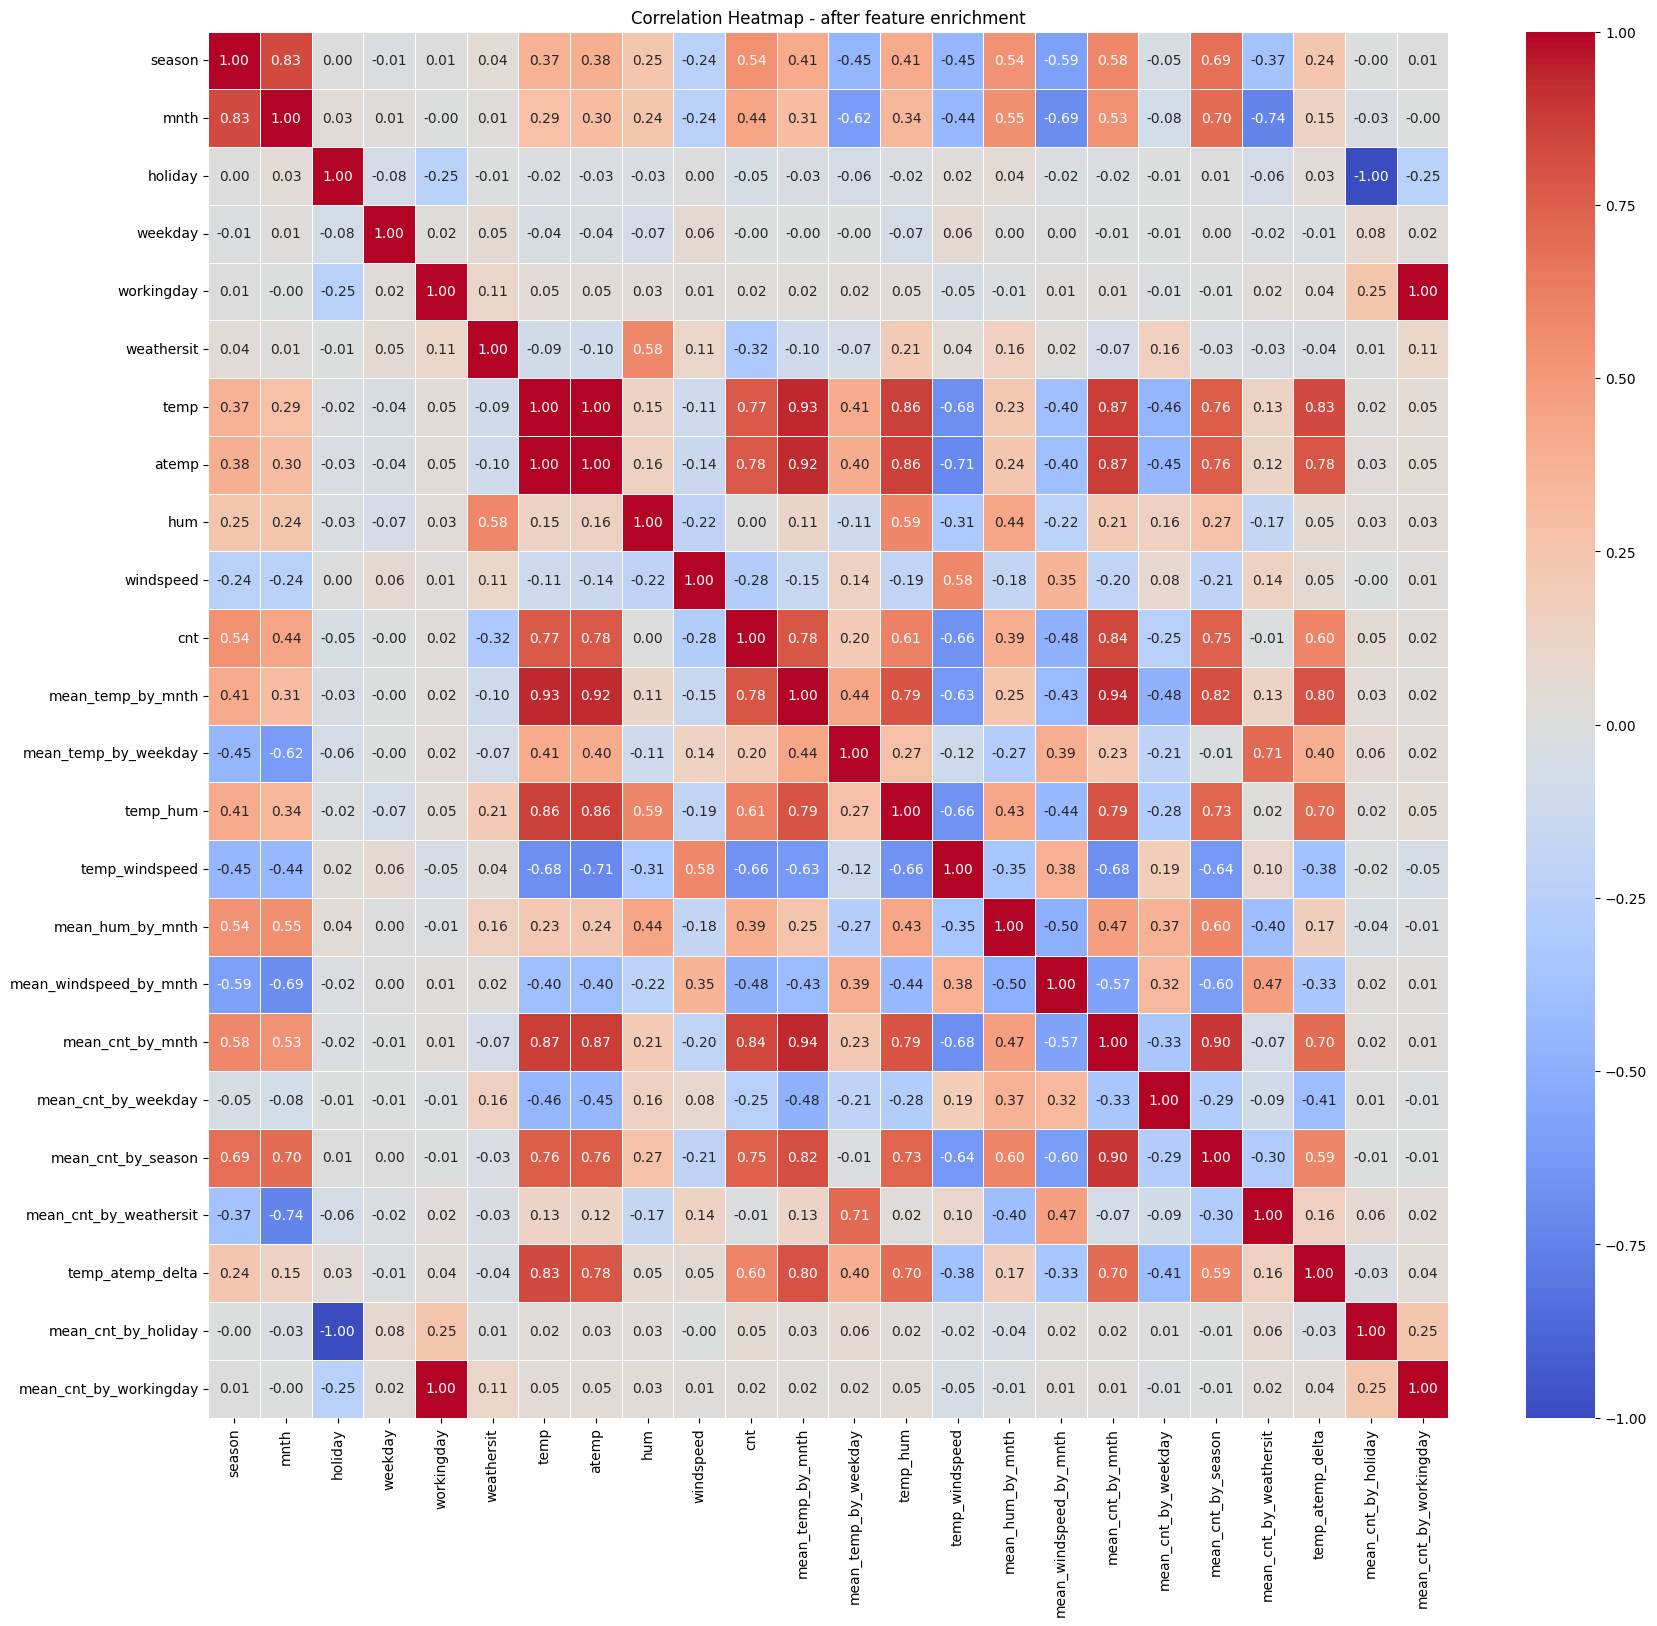

In [ ]:
correlation_matrix1 = df_features.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - after feature enrichment')
plt.show()

In [ ]:
from scipy import stats
x_features = df_features.loc[:, ~df_features.columns.isin(['cnt'])]
y_features = df_features['cnt']
x_features_col = x_features.columns
correlation_features = []

for col in range(len(x_features_col)):
    cor_spearman = stats.spearmanr(x_features[x_features_col[col]], y_features)
    correlation_features.append({
            'Variable1': x_features_col[col],
            'Variable2': 'cnt',
            'SpearmanCorrelation': cor_spearman.correlation,
            'P-value': cor_spearman.pvalue
        })

correlation_features_df = pd.DataFrame(correlation_features)
high_correlation = correlation_features_df[correlation_features_df['P-value'] < 0.05].round(3)
high_correlation

,Variable1,Variable2,SpearmanCorrelation,P-value
0,season,cnt,0.490,0.000
1,mnth,cnt,0.391,0.000
5,weathersit,cnt,-0.305,0.000
6,temp,cnt,0.762,0.000
7,atemp,cnt,0.767,0.000
9,windspeed,cnt,-0.258,0.000
10,mean_temp_by_mnth,cnt,0.759,0.000
11,mean_temp_by_weekday,cnt,0.315,0.000
12,temp_hum,cnt,0.590,0.000
13,temp_windspeed,cnt,-0.693,0.000


In [ ]:
low_correlation = correlation_features_df[correlation_features_df['P-value'] >= 0.05].round(3)
low_correlation

,Variable1,Variable2,SpearmanCorrelation,P-value
2,holiday,cnt,-0.056,0.290
3,weekday,cnt,0.010,0.853
4,workingday,cnt,0.009,0.860
8,hum,cnt,-0.019,0.711
21,mean_cnt_by_holiday,cnt,0.056,0.290
22,mean_cnt_by_workingday,cnt,0.009,0.860


## Feature Selection

In [ ]:
varsel = pd.DataFrame({'Variable': x_features_col})
varsel

,Variable
0,season
1,mnth
2,holiday
3,weekday
4,workingday
5,weathersit
6,temp
7,atemp
8,hum
9,windspeed


In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
x_features

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,temp_windspeed,mean_hum_by_mnth,mean_windspeed_by_mnth,mean_cnt_by_mnth,mean_cnt_by_weekday,mean_cnt_by_season,mean_cnt_by_weathersit,temp_atemp_delta,mean_cnt_by_holiday,mean_cnt_by_workingday
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,...,0.466186,0.584366,0.195419,1231.903226,3405.269231,1666.666667,3694.986726,-0.019458,3417.129577,3363.817391
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,...,0.683780,0.584366,0.195419,1231.903226,3405.269231,1666.666667,3694.986726,0.009739,3417.129577,3363.817391
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,...,1.264534,0.584366,0.195419,1231.903226,3405.269231,1666.666667,3694.986726,0.006959,3417.129577,3425.056000
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,...,0.801480,0.584366,0.195419,1231.903226,3405.269231,1666.666667,3694.986726,-0.012122,3417.129577,3425.056000
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,...,0.823504,0.584366,0.195419,1231.903226,3405.269231,1666.666667,3694.986726,-0.002313,3417.129577,3425.056000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,...,0.579846,0.649183,0.168040,2816.870968,3391.377358,3664.460674,1674.133333,-0.002633,3417.129577,3425.056000
361,1,12,0,3,1,1,0.299130,0.279974,0.503913,0.293961,...,0.982720,0.649183,0.168040,2816.870968,3391.377358,3664.460674,1674.133333,0.019156,3417.129577,3425.056000
362,1,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412,...,0.480854,0.649183,0.168040,2816.870968,3391.377358,3664.460674,1674.133333,-0.015559,3417.129577,3425.056000
363,1,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,...,0.431027,0.649183,0.168040,2816.870968,3391.377358,3664.460674,1674.133333,-0.007145,3417.129577,3425.056000


In [ ]:
y_features

0       985
1       801
2      1349
3      1562
4      1600
       ... 
360    1162
361    2302
362    2423
363    2999
364    2485
Name: cnt, Length: 365, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
linearmod = LinearRegression().fit(x_features, y_features)
model = SelectFromModel(linearmod, prefit=True)
varsel['LinearRegression'] = model.get_support().astype('int64')

In [ ]:
sgdmod = SGDRegressor(random_state=2).fit(x_features, y_features)
model = SelectFromModel(sgdmod, prefit=True)
varsel['SGD'] = model.get_support().astype('int64')

In [ ]:
treemod = DecisionTreeRegressor(random_state=2, min_samples_leaf=3).fit(x_features, y_features)
model = SelectFromModel(treemod, prefit=True)
varsel['DecisionTreeRegressor'] = model.get_support().astype('int64')

In [ ]:
rfmod = RandomForestRegressor(random_state=2, min_samples_leaf=3).fit(x_features, y_features)
model = SelectFromModel(rfmod, prefit=True)
varsel['RandomForestRegressor'] = model.get_support().astype('int64')
dict(sorted(zip(rfmod.feature_importances_.round(4), rfmod.feature_names_in_,), reverse=True))

{0.2752: 'temp',
 0.2549: 'atemp',
 0.0991: 'season',
 0.0818: 'mean_cnt_by_mnth',
 0.0597: 'hum',
 0.0386: 'mean_temp_by_mnth',
 0.0368: 'temp_windspeed',
 0.0289: 'weathersit',
 0.0235: 'temp_hum',
 0.0194: 'mean_hum_by_mnth',
 0.0131: 'windspeed',
 0.0127: 'mean_cnt_by_season',
 0.0126: 'mean_windspeed_by_mnth',
 0.0104: 'mnth',
 0.009: 'mean_cnt_by_weekday',
 0.0087: 'temp_atemp_delta',
 0.0074: 'weekday',
 0.0032: 'mean_temp_by_weekday',
 0.0023: 'mean_cnt_by_workingday',
 0.0015: 'workingday',
 0.0012: 'mean_cnt_by_weathersit',
 0.0: 'holiday'}

In [ ]:
adaboostmod = AdaBoostRegressor(random_state=2).fit(x_features, y_features)
model = SelectFromModel(adaboostmod, prefit=True)
varsel['AdaBoostRegressor'] = model.get_support().astype('int64')
dict(sorted(zip(adaboostmod.feature_importances_.round(3), adaboostmod.feature_names_in_,), reverse=True))

{0.307: 'atemp',
 0.172: 'temp',
 0.142: 'temp_windspeed',
 0.106: 'hum',
 0.054: 'temp_hum',
 0.047: 'season',
 0.045: 'weathersit',
 0.037: 'windspeed',
 0.014: 'mean_cnt_by_weekday',
 0.009: 'mnth',
 0.008: 'mean_cnt_by_mnth',
 0.007: 'mean_hum_by_mnth',
 0.006: 'mean_windspeed_by_mnth',
 0.005: 'mean_temp_by_mnth',
 0.004: 'mean_cnt_by_holiday',
 0.003: 'holiday',
 0.001: 'mean_cnt_by_season',
 0.0: 'mean_cnt_by_weathersit'}

In [ ]:
gbmod = GradientBoostingRegressor(random_state=2).fit(x_features, y_features)
model = SelectFromModel(gbmod, prefit=True)
varsel['GradientBoostingRegressor'] = model.get_support().astype('int64')
dict(sorted(zip(gbmod.feature_importances_.round(4), gbmod.feature_names_in_,), reverse=True))

{0.3448: 'temp',
 0.2166: 'atemp',
 0.1098: 'season',
 0.0774: 'mean_cnt_by_mnth',
 0.0633: 'hum',
 0.0551: 'temp_windspeed',
 0.05: 'weathersit',
 0.0165: 'temp_hum',
 0.0124: 'mean_hum_by_mnth',
 0.0088: 'mean_temp_by_mnth',
 0.0082: 'windspeed',
 0.0078: 'mean_temp_by_weekday',
 0.0067: 'mean_cnt_by_weekday',
 0.0039: 'mnth',
 0.0036: 'mean_windspeed_by_mnth',
 0.0034: 'mean_cnt_by_holiday',
 0.0032: 'weekday',
 0.0022: 'temp_atemp_delta',
 0.0014: 'mean_cnt_by_workingday',
 0.0012: 'holiday',
 0.0003: 'mean_cnt_by_weathersit',
 0.0: 'mean_cnt_by_season'}

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgbmod = xgb.XGBRegressor().fit(x_features, y_features)
model = SelectFromModel(xgbmod, prefit=True)
varsel['XGBoost'] = model.get_support().astype('int64')
dict(sorted(zip(xgbmod.feature_importances_.round(4), xgbmod.feature_names_in_,), reverse=True))

{0.2209: 'mean_cnt_by_mnth',
 0.2158: 'temp',
 0.1625: 'atemp',
 0.0953: 'season',
 0.0822: 'weathersit',
 0.0494: 'mean_cnt_by_weekday',
 0.0321: 'holiday',
 0.0284: 'mean_temp_by_weekday',
 0.0224: 'hum',
 0.0165: 'temp_windspeed',
 0.0136: 'mnth',
 0.0118: 'temp_hum',
 0.0115: 'workingday',
 0.0076: 'mean_temp_by_mnth',
 0.0068: 'mean_windspeed_by_mnth',
 0.0065: 'mean_cnt_by_season',
 0.0047: 'windspeed',
 0.004: 'weekday',
 0.0037: 'temp_atemp_delta',
 0.0022: 'mean_hum_by_mnth',
 0.0021: 'mean_cnt_by_weathersit',
 0.0: 'mean_cnt_by_holiday'}

In [ ]:
xgb_cumulative_importance = 0
xgb_top_features = []
for importance, feature in sorted(zip(xgbmod.feature_importances_, xgbmod.feature_names_in_), reverse=True):
    xgb_cumulative_importance += importance
    xgb_top_features.append(feature)
    if xgb_cumulative_importance >= 0.90:
        break

# GradientBoostingRegressor cumulative importance
gb_cumulative_importance = 0
gb_top_features = []
for importance, feature in sorted(zip(gbmod.feature_importances_, gbmod.feature_names_in_), reverse=True):
    gb_cumulative_importance += importance
    gb_top_features.append(feature)
    if gb_cumulative_importance >= 0.90:
        break

In [ ]:
# Intersection of top features based on feature importance ratio
common_features = list(set(xgb_top_features) & set(gb_top_features))
common_features

['temp', 'season', 'weathersit', 'mean_cnt_by_mnth', 'hum', 'atemp']

In [ ]:
list(set(xgbmod.feature_names_in_) & set(gbmod.feature_names_in_))

['temp',
 'mean_cnt_by_weekday',
 'mnth',
 'workingday',
 'temp_hum',
 'season',
 'weathersit',
 'mean_cnt_by_season',
 'mean_cnt_by_mnth',
 'temp_windspeed',
 'temp_atemp_delta',
 'weekday',
 'mean_hum_by_mnth',
 'hum',
 'mean_windspeed_by_mnth',
 'holiday',
 'mean_cnt_by_workingday',
 'mean_cnt_by_weathersit',
 'mean_temp_by_weekday',
 'mean_cnt_by_holiday',
 'mean_temp_by_mnth',
 'windspeed',
 'atemp']

In [ ]:
varsel

,Variable,LinearRegression,SGD,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,XGBoost
0,season,0,0,1,1,1,1,1
1,mnth,0,0,0,0,0,0,0
2,holiday,0,0,0,0,0,0,0
3,weekday,0,0,0,0,0,0,0
4,workingday,0,0,0,0,0,0,0
5,weathersit,0,0,1,0,1,1,1
6,temp,1,0,1,1,1,1,1
7,atemp,0,0,1,1,1,1,1
8,hum,0,0,0,1,1,1,0
9,windspeed,0,0,0,0,0,0,0


In [ ]:
varsel['Sum'] = np.sum(varsel, axis=1)
varsel

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,Variable,LinearRegression,SGD,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,XGBoost,Sum
0,season,0,0,1,1,1,1,1,5
1,mnth,0,0,0,0,0,0,0,0
2,holiday,0,0,0,0,0,0,0,0
3,weekday,0,0,0,0,0,0,0,0
4,workingday,0,0,0,0,0,0,0,0
5,weathersit,0,0,1,0,1,1,1,4
6,temp,1,0,1,1,1,1,1,6
7,atemp,0,0,1,1,1,1,1,5
8,hum,0,0,0,1,1,1,0,3
9,windspeed,0,0,0,0,0,0,0,0


In [ ]:
varsel[varsel['Sum']>=1]

,Variable,LinearRegression,SGD,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,XGBoost,Sum
0,season,0,0,1,1,1,1,1,5
5,weathersit,0,0,1,0,1,1,1,4
6,temp,1,0,1,1,1,1,1,6
7,atemp,0,0,1,1,1,1,1,5
8,hum,0,0,0,1,1,1,0,3
10,mean_temp_by_mnth,1,0,0,0,0,0,0,1
11,mean_temp_by_weekday,1,0,0,0,0,0,0,1
12,temp_hum,0,0,0,0,1,0,0,1
13,temp_windspeed,0,0,0,0,1,1,0,2
15,mean_windspeed_by_mnth,1,0,0,0,0,0,0,1


In [ ]:
x_features_col

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'mean_temp_by_mnth',
       'mean_temp_by_weekday', 'temp_hum', 'temp_windspeed',
       'mean_hum_by_mnth', 'mean_windspeed_by_mnth', 'mean_cnt_by_mnth',
       'mean_cnt_by_weekday', 'mean_cnt_by_season', 'mean_cnt_by_weathersit',
       'temp_atemp_delta', 'mean_cnt_by_holiday', 'mean_cnt_by_workingday'],
      dtype='object')

In [ ]:
df['temp_windspeed'] = df_features['temp_windspeed']
df['temp_hum'] = df_features['temp_hum']
df['mean_cnt_by_mnth'] = df_features['mean_cnt_by_mnth']
df['mean_cnt_by_weekday'] = df_features['mean_cnt_by_weekday']
df['mean_windspeed_by_mnth'] = df_features['mean_windspeed_by_mnth']
df['mean_temp_by_mnth'] = df_features['mean_temp_by_mnth']
df['mean_hum_by_mnth'] = df_features['mean_hum_by_mnth']
df['mean_temp_by_weekday'] = df_features['mean_temp_by_weekday']

In [ ]:
df

,id,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,temp_windspeed,temp_hum,mean_cnt_by_mnth,mean_cnt_by_weekday,mean_windspeed_by_mnth,mean_temp_by_mnth,mean_hum_by_mnth,mean_temp_by_weekday
0,1,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0.466186,0.277341,1231.903226,3405.269231,0.195419,0.197707,0.584366,0.482468
1,2,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0.683780,0.253012,1231.903226,3405.269231,0.195419,0.197707,0.584366,0.482468
2,3,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,1.264534,0.085865,1231.903226,3405.269231,0.195419,0.197707,0.584366,0.482468
3,4,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0.801480,0.118087,1231.903226,3405.269231,0.195419,0.197707,0.584366,0.482468
4,5,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0.823504,0.099170,1231.903226,3405.269231,0.195419,0.197707,0.584366,0.482468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,1,12,0,2,1,2,0.325000,0.327633,0.762500,0.188450,1162,0.579846,0.247812,2816.870968,3391.377358,0.168040,0.325182,0.649183,0.466538
361,362,1,12,0,3,1,1,0.299130,0.279974,0.503913,0.293961,2302,0.982720,0.150735,2816.870968,3391.377358,0.168040,0.325182,0.649183,0.466538
362,363,1,12,0,4,1,1,0.248333,0.263892,0.574167,0.119412,2423,0.480854,0.142585,2816.870968,3391.377358,0.168040,0.325182,0.649183,0.466538
363,364,1,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,2999,0.431027,0.198428,2816.870968,3391.377358,0.168040,0.325182,0.649183,0.466538


## Splitting the data and determinating the RMSLE evaluation metric

In [ ]:
import sklearn.metrics as metrics
def RMSLE(y, y_pred):
    return np.sqrt(metrics.mean_squared_log_error(y, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#X = df.loc[:, ~df.columns.isin(['id', 'cnt', 'atemp', 'mnth', 'holiday', 'weekday', 'workingday'])]
X = df[['mean_windspeed_by_mnth',
 'mean_cnt_by_weekday',
 'mean_cnt_by_mnth',
 'mean_temp_by_mnth',
 'mean_hum_by_mnth',
 'windspeed',
 'hum',
 'mean_temp_by_weekday',
 'mnth',
 'temp_windspeed',
 'temp_hum',
 'season',
 'weathersit',
 'temp',
 'atemp',
 'weekday']]
X

,mean_windspeed_by_mnth,mean_cnt_by_weekday,mean_cnt_by_mnth,mean_temp_by_mnth,mean_hum_by_mnth,windspeed,hum,mean_temp_by_weekday,mnth,temp_windspeed,temp_hum,season,weathersit,temp,atemp,weekday
0,0.195419,3405.269231,1231.903226,0.197707,0.584366,0.160446,0.805833,0.482468,1,0.466186,0.277341,1,2,0.344167,0.363625,6
1,0.195419,3405.269231,1231.903226,0.197707,0.584366,0.248539,0.696087,0.482468,1,0.683780,0.253012,1,2,0.363478,0.353739,0
2,0.195419,3405.269231,1231.903226,0.197707,0.584366,0.248309,0.437273,0.482468,1,1.264534,0.085865,1,1,0.196364,0.189405,1
3,0.195419,3405.269231,1231.903226,0.197707,0.584366,0.160296,0.590435,0.482468,1,0.801480,0.118087,1,1,0.200000,0.212122,2
4,0.195419,3405.269231,1231.903226,0.197707,0.584366,0.186900,0.436957,0.482468,1,0.823504,0.099170,1,1,0.226957,0.229270,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.168040,3391.377358,2816.870968,0.325182,0.649183,0.188450,0.762500,0.466538,12,0.579846,0.247812,1,2,0.325000,0.327633,2
361,0.168040,3391.377358,2816.870968,0.325182,0.649183,0.293961,0.503913,0.466538,12,0.982720,0.150735,1,1,0.299130,0.279974,3
362,0.168040,3391.377358,2816.870968,0.325182,0.649183,0.119412,0.574167,0.466538,12,0.480854,0.142585,1,1,0.248333,0.263892,4
363,0.168040,3391.377358,2816.870968,0.325182,0.649183,0.134337,0.636667,0.466538,12,0.431027,0.198428,1,1,0.311667,0.318812,5


In [ ]:
y = df['cnt']
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
360    1162
361    2302
362    2423
363    2999
364    2485
Name: cnt, Length: 365, dtype: int64

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(X,y, test_size=0.35, random_state=9)

In [ ]:
print('X train: ', X_train.shape)
print('X dev: ', X_dev.shape)
print('y train: ', y_train.shape)
print('y dev: ', y_dev.shape)

X train:  (237, 16)
X dev:  (128, 16)
y train:  (237,)
y dev:  (128,)


In [ ]:
print('y train: ', sum(y_train)/len(y_train)*100)
print('y dev: ', sum(y_dev)/len(y_dev)*100)

y train:  341299.15611814347
y dev:  339237.5


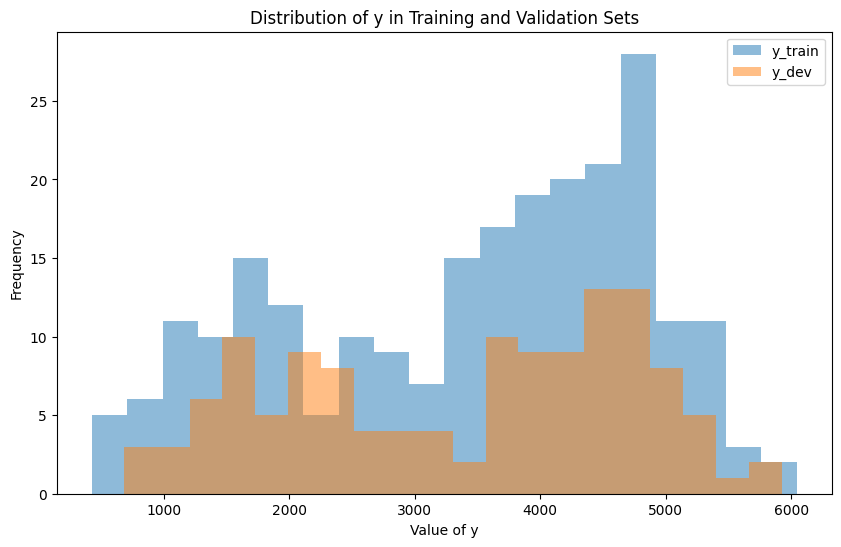

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, label='y_train', alpha=0.5, bins=20)
plt.hist(y_dev, label='y_dev', alpha=0.5, bins=20)
plt.xlabel('Value of y')
plt.ylabel('Frequency')
plt.title('Distribution of y in Training and Validation Sets')
plt.legend()
plt.show()

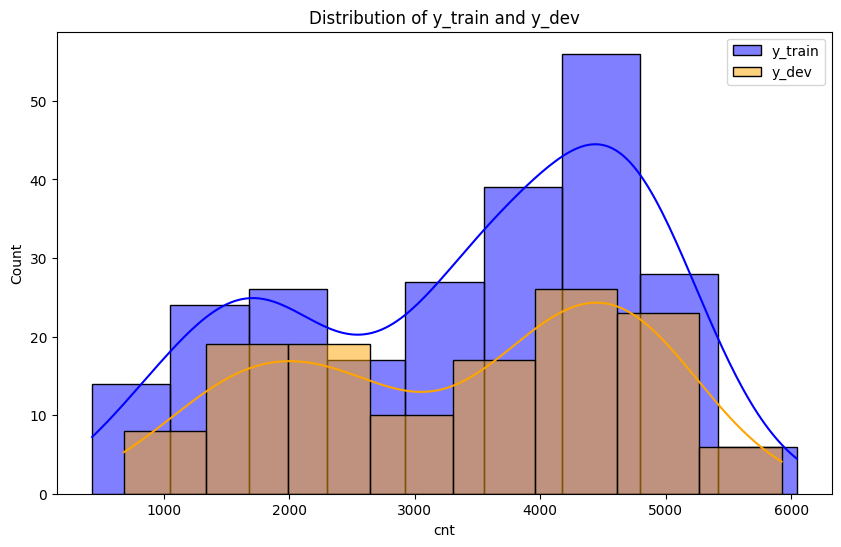

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, color='blue', label='y_train', kde=True)
sns.histplot(y_dev, color='orange', label='y_dev', kde=True)
plt.title('Distribution of y_train and y_dev')
plt.legend()
plt.show()

In [ ]:
models_list = pd.DataFrame()

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_dev)
rmsle_linear_reg = RMSLE(y_dev, linear_reg_pred)

In [ ]:
# Append model information to the DataFrame
models_list = models_list.append({'Model': 'Linear Regression', 'RMSLE': rmsle_linear_reg}, ignore_index=True)
models_list

<ipython-input-56-766964e31a07>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_list = models_list.append({'Model': 'Linear Regression', 'RMSLE': rmsle_linear_reg}, ignore_index=True)


,Model,RMSLE
0,Linear Regression,0.237732


<Axes: xlabel='cnt'>

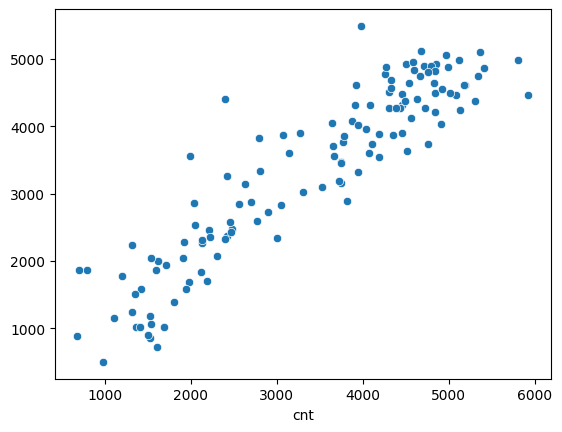

In [ ]:
sns.scatterplot(x=y_dev, y=linear_reg_pred)

## Desicion Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
desiciontree = DecisionTreeRegressor(random_state=1, min_samples_leaf=3)
desiciontree.fit(X_train, y_train)
desiciontree_pred = desiciontree.predict(X_dev)
rmsle_desiciontree = RMSLE(y_dev, desiciontree_pred)

In [ ]:
models_list = models_list.append({'Model': 'Desicion Tree', 'RMSLE': rmsle_desiciontree}, ignore_index=True)
models_list

<ipython-input-60-991d95edcf58>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_list = models_list.append({'Model': 'Desicion Tree', 'RMSLE': rmsle_desiciontree}, ignore_index=True)


,Model,RMSLE
0,Linear Regression,0.237732
1,Desicion Tree,0.251689


<Axes: xlabel='cnt'>

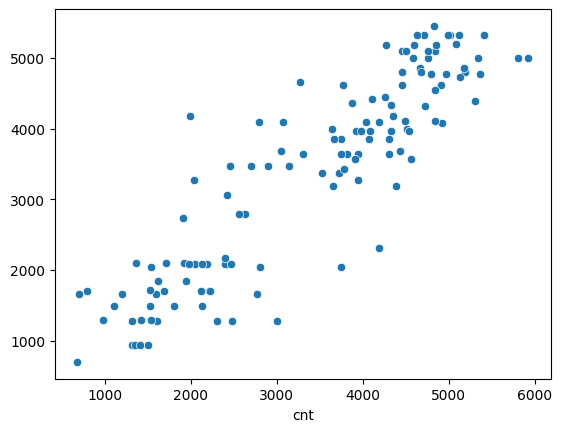

In [ ]:
sns.scatterplot(x=y_dev, y=desiciontree_pred)

## Ensemble models

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=1, min_samples_leaf=3)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_dev)
rmsle_rf = RMSLE(y_dev, rf_pred)

In [ ]:
models_list = models_list.append({'Model': 'Random Forest', 'RMSLE': rmsle_rf}, ignore_index=True)
models_list

<ipython-input-64-4d4cdcb7db0f>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_list = models_list.append({'Model': 'Random Forest', 'RMSLE': rmsle_rf}, ignore_index=True)


,Model,RMSLE
0,Linear Regression,0.237732
1,Desicion Tree,0.251689
2,Random Forest,0.215010


<Axes: xlabel='cnt'>

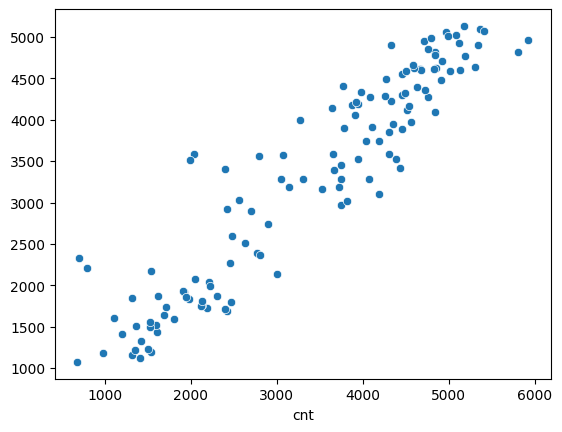

In [ ]:
sns.scatterplot(x=y_dev, y=rf_pred)

### AdaBoost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost = AdaBoostRegressor(random_state=2)
adaboost.fit(X_train, y_train)
adaboost_pred = adaboost.predict(X_dev)
rmsle_adaboost = RMSLE(y_dev, adaboost_pred)

In [ ]:
models_list = models_list.append({'Model': 'AdABoost', 'RMSLE': rmsle_adaboost}, ignore_index=True)
models_list

<ipython-input-68-3007e2ee5ad0>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_list = models_list.append({'Model': 'AdABoost', 'RMSLE': rmsle_adaboost}, ignore_index=True)


,Model,RMSLE
0,Linear Regression,0.237732
1,Desicion Tree,0.251689
2,Random Forest,0.215010
3,AdABoost,0.231264


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm = GradientBoostingRegressor(random_state=1)
                                #learning_rate= 0.1, max_depth= 5, min_samples_leaf= 3, min_samples_split= 10, n_estimators= 100)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_dev)
rmsle_gbm = RMSLE(y_dev, gbm_pred)

In [ ]:
models_list = models_list.append({'Model': 'Gradient Boosting Regressor', 'RMSLE': rmsle_gbm}, ignore_index=True)
models_list

<ipython-input-71-28fe7ad33cfb>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_list = models_list.append({'Model': 'Gradient Boosting Regressor', 'RMSLE': rmsle_gbm}, ignore_index=True)


,Model,RMSLE
0,Linear Regression,0.237732
1,Desicion Tree,0.251689
2,Random Forest,0.215010
3,AdABoost,0.231264
4,Gradient Boosting Regressor,0.218957


In [ ]:
gbm1 = GradientBoostingRegressor(random_state=1, min_samples_leaf= 3, subsample=0.8,  learning_rate=0.1, n_estimators=50)
gbm1.fit(X_train, y_train)
gbm_pred1 = gbm1.predict(X_dev)
rmsle_gbm1 = RMSLE(y_dev, gbm_pred1)
models_list = models_list.append({'Model': 'Gradient Boosting Regressor after fine-tuning', 'RMSLE': rmsle_gbm1}, ignore_index=True)
models_list

<ipython-input-72-52012197689c>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_list = models_list.append({'Model': 'Gradient Boosting Regressor after fine-tuning', 'RMSLE': rmsle_gbm1}, ignore_index=True)


,Model,RMSLE
0,Linear Regression,0.237732
1,Desicion Tree,0.251689
2,Random Forest,0.215010
3,AdABoost,0.231264
4,Gradient Boosting Regressor,0.218957
5,Gradient Boosting Regressor after fine-tuning,0.205350


## SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_dev)
rmsle_svr = RMSLE(y_dev, svr_pred)

In [ ]:
models_list = models_list.append({'Model': 'SVR', 'RMSLE': rmsle_svr}, ignore_index=True)
models_list

<ipython-input-76-62dec73962d4>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_list = models_list.append({'Model': 'SVR', 'RMSLE': rmsle_svr}, ignore_index=True)


,Model,RMSLE
0,Linear Regression,0.237732
1,Desicion Tree,0.251689
2,Random Forest,0.215010
3,AdABoost,0.231264
4,Gradient Boosting Regressor,0.218957
5,Gradient Boosting Regressor after fine-tuning,0.205350
6,SVR,0.531038


## XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor(eval_metric='rmsle')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_dev)
rmsle_xgb = RMSLE(y_dev, xgb_pred)

In [ ]:
models_list = models_list.append({'Model': 'XGBoost', 'RMSLE': rmsle_xgb}, ignore_index=True)
models_list

<ipython-input-80-2ca73422c278>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_list = models_list.append({'Model': 'XGBoost', 'RMSLE': rmsle_xgb}, ignore_index=True)


,Model,RMSLE
0,Linear Regression,0.237732
1,Desicion Tree,0.251689
2,Random Forest,0.215010
3,AdABoost,0.231264
4,Gradient Boosting Regressor,0.218957
5,Gradient Boosting Regressor after fine-tuning,0.205350
6,SVR,0.531038
7,XGBoost,0.231451


In [ ]:
xgb_model1 = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=50,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    booster='gbtree',
    eval_metric='rmsle'
)
xgb_model1.fit(X_train, y_train)
xgb_pred1 = xgb_model1.predict(X_dev)
rmsle_xgb1 = RMSLE(y_dev, xgb_pred)
models_list = models_list.append({'Model': 'XGBoost after fine-tuning', 'RMSLE': rmsle_xgb1}, ignore_index=True)
models_list

<ipython-input-81-e567128a2d32>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models_list = models_list.append({'Model': 'XGBoost after fine-tuning', 'RMSLE': rmsle_xgb1}, ignore_index=True)


,Model,RMSLE
0,Linear Regression,0.237732
1,Desicion Tree,0.251689
2,Random Forest,0.215010
3,AdABoost,0.231264
4,Gradient Boosting Regressor,0.218957
5,Gradient Boosting Regressor after fine-tuning,0.205350
6,SVR,0.531038
7,XGBoost,0.231451
8,XGBoost after fine-tuning,0.231451


In [ ]:
models_list.sort_values(by=['RMSLE'])

,Model,RMSLE
5,Gradient Boosting Regressor after fine-tuning,0.205350
2,Random Forest,0.215010
4,Gradient Boosting Regressor,0.218957
3,AdABoost,0.231264
7,XGBoost,0.231451
8,XGBoost after fine-tuning,0.231451
0,Linear Regression,0.237732
1,Desicion Tree,0.251689
6,SVR,0.531038


## Test the models

In [ ]:
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_test['temp_windspeed'] = df_test['windspeed'] / df_test['temp']
df_test['temp_hum'] = df_test['temp'] * df_test['hum']
df_test['mean_cnt_by_mnth'] = df['mean_cnt_by_mnth']
df_test['mean_cnt_by_weekday'] = df['mean_cnt_by_weekday']
df_test['mean_cnt_by_mnth'].fillna(2816.870968, inplace=True)
df_test['mean_cnt_by_weekday'].fillna(3391.377358, inplace=True)

In [ ]:
days_in_month_test = df_test.groupby('mnth')['id'].count()
mean_temp_by_mnth_test = df_test.groupby('mnth')['temp'].mean().reindex(range(1, 13)).reset_index(drop=True).repeat(days_in_month_test)
days_in_week_test = df_test.groupby('weekday')['id'].count()
mean_temp_by_weekday_test = df_test.groupby('weekday')['temp'].mean().reindex(range(0, 7)).reset_index(drop=True).repeat(days_in_week_test)
mean_hum_by_mnth_test = df_test.groupby('mnth')['hum'].mean().reindex(range(1, 13)).reset_index(drop=True).repeat(days_in_month_test)
mean_windspeed_by_mnth_test = df_test.groupby('mnth')['windspeed'].mean().reindex(range(1, 13)).reset_index(drop=True).repeat(days_in_month_test)

In [ ]:
df_test['mean_windspeed_by_mnth'] = mean_windspeed_by_mnth_test.reset_index(drop=True)
df_test['mean_temp_by_mnth'] = mean_temp_by_mnth_test.reset_index(drop=True)
df_test['mean_hum_by_mnth'] = mean_hum_by_mnth_test.reset_index(drop=True)
df_test['mean_temp_by_weekday'] = mean_temp_by_weekday_test.reset_index(drop=True)

In [ ]:
test = df_test[['mean_windspeed_by_mnth',
 'mean_cnt_by_weekday',
 'mean_cnt_by_mnth',
 'mean_temp_by_mnth',
 'mean_hum_by_mnth',
 'windspeed',
 'hum',
 'mean_temp_by_weekday',
 'mnth',
 'temp_windspeed',
 'temp_hum',
 'season',
 'weathersit',
 'temp',
 'atemp',
 'weekday']]

In [ ]:
test

,mean_windspeed_by_mnth,mean_cnt_by_weekday,mean_cnt_by_mnth,mean_temp_by_mnth,mean_hum_by_mnth,windspeed,hum,mean_temp_by_weekday,mnth,temp_windspeed,temp_hum,season,weathersit,temp,atemp,weekday
0,0.217187,3405.269231,1231.903226,0.275181,0.587290,0.192167,0.692500,0.484765,1,0.519370,0.256225,1,1,0.370000,0.375621,0
1,0.217187,3405.269231,1231.903226,0.275181,0.587290,0.329665,0.381304,0.484765,1,1.207374,0.104112,1,1,0.273043,0.252304,1
2,0.217187,3405.269231,1231.903226,0.275181,0.587290,0.365671,0.441250,0.484765,1,2.437807,0.066187,1,1,0.150000,0.126275,2
3,0.217187,3405.269231,1231.903226,0.275181,0.587290,0.184700,0.414583,0.484765,1,1.718140,0.044568,1,2,0.107500,0.119337,3
4,0.217187,3405.269231,1231.903226,0.275181,0.587290,0.129987,0.524167,0.484765,1,0.488980,0.139341,1,1,0.265833,0.278412,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.185178,3391.377358,2816.870968,0.322880,0.682898,0.350133,0.652917,0.497837,12,1.377571,0.165950,1,2,0.254167,0.226642,4
362,0.185178,3391.377358,2816.870968,0.322880,0.682898,0.155471,0.590000,0.497837,12,0.613702,0.149466,1,2,0.253333,0.255046,5
363,0.185178,3391.377358,2816.870968,0.322880,0.682898,0.124383,0.752917,0.497837,12,0.490986,0.190739,1,2,0.253333,0.242400,6
364,0.185178,3391.377358,2816.870968,0.322880,0.682898,0.350754,0.483333,0.497837,12,1.371027,0.123653,1,1,0.255833,0.231700,0


In [ ]:
linear_reg_pred1 = linear_reg_model.predict(test)

In [ ]:
desiciontree_pred1 = desiciontree.predict(test)

In [ ]:
rf_pred1 = rf.predict(test)

In [ ]:
adaboost_pred1 = adaboost.predict(test)

In [ ]:
gbm_pred1 = gbm1.predict(test)

In [ ]:
svr_pred1 = svr.predict(test)

In [ ]:
xgb_pred1 = xgb_model.predict(test)

In [ ]:
model_predictions = [
    linear_reg_pred1,
    desiciontree_pred1,
    rf_pred1,
    adaboost_pred1,
    gbm_pred1,
    svr_pred1,
    xgb_pred1
]

# List of model names
model_names = [
    'Linear Regression',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'SVR',
    'XGBoost'
]

# Create a DataFrame to store the predictions for each model
predictions_df = pd.DataFrame(columns=['id', 'cnt_pred'])

# Add the id and predicted cnt values for each model to the DataFrame
predictions_df['id'] = df_test['id']
for i, pred in enumerate(model_predictions):
    predictions_df[f'cnt_pred_{model_names[i]}'] = pred

# Export the DataFrame to separate CSV files for each model
for i, name in enumerate(model_names):
    filename = f'{name}_predictions.csv'
    predictions_df[['id', f'cnt_pred_{name}']].to_csv(filename, index=False)